
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---

# Trabajo práctico entregable - Parte 2

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import scipy

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del Salario Neto para Hombres menos la media del Salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

**Paso 1 :Preparación de la base**

Al trabajar con salarios, volveremos a "curar" la base según idénticos criterios que los adoptados en el parte 1.
1. Excluir los casos en donde la diferncias entre salario neto y bruto sean menor a 20.4% y donde el salario bruto sea mayor al 80% del salario neto. Estos criterios, surgen de evaluar el impacto de la retenciones según ley argentina sobre los sueldo brutos(11% Caja de Jubilación, 3% Obra social, 3% Pami) y la máxima retención que puede sufrir un asalariado por pago a cuenta de impuesto a las ganancias 33%). 
2. También consideramos como outliers los salarios brutos mayor a 36.000  y menor a 350.000 según el analisis decripto en la parte 1

In [4]:
df_SBandSN_OK = df[(df.salary_monthly_BRUTO >= df.salary_monthly_NETO*1.205) 
        &(df.salary_monthly_BRUTO <= df.salary_monthly_NETO*1.8)]

In [5]:
df_salary_ok = [(df_SBandSN_OK.salary_monthly_BRUTO > 36000) & (df_SBandSN_OK.salary_monthly_BRUTO < 350000)]

**Paso 2 :Realizamos la estimación puntual de la media del salario neto de ambas poblaciones**

In [118]:
is_man = df.profile_gender == 'Hombre'
groupA = df[(is_man)].salary_monthly_NETO   # hombres
groupB = df[( ~is_man)].salary_monthly_NETO  # mujer + otros

In [7]:
groupA.describe().round()

count       4944.0
mean       98836.0
std       102160.0
min            1.0
25%        53285.0
50%        80000.0
75%       110000.0
max      2080000.0
Name: salary_monthly_NETO, dtype: float64

In [8]:
groupB.describe().round()

count       939.0
mean      74226.0
std       57679.0
min           2.0
25%       43800.0
50%       65000.0
75%       92250.0
max      800000.0
Name: salary_monthly_NETO, dtype: float64

In [9]:
# Calculamos la estimación puntual de la diferencia de medias = $ 24.610,33
dif_mean = round((groupA. mean() - groupB.mean()),2)
dif_mean

24610.33

Dada la estimación puntual realizada, podemos inferir que la diferencia entre salarios netos entre hombre y otros géneros (mujeres+otros) es de 24.610,33 pesos. También podemos decir que dada la estimación puntual realizada, en promedio los hombre cobran 24.610,33 pesos más que el grupo mujeres y otros géneros.
Al determinar un dato puntual, es poco probable que esta afirmación la podamos repertir cualqueir otra muestra aleatoria que tomemos. Para ello es más recomendable determinar un intervalo entre el cual es probable que la diferencia de medias varíe, dado una confianza determinada. 

**Paso 3. Calculamos un intervalo de confianza de nivel (1-alpha) para la resta entre la media del Salario Neto para Hombres menos la media del Salario Neto para otros géneros**

Se deben dar 3 condiciones:

Independencia: se supone que las dos muestras se consideran independientes ya que las respuestas de nivel de estudio son únicas y exclusivas de una sola persona, se han obtenido de forma aleatoria y no guardan relación unas con otras.

Normalidad: ambas poblaciones deben mostrar una distribución aproximadamente normal. Por Teorema Central del Límite podemos decir que si nuestra muestra es razonablemente grande (n>30, )la distribución de la media muestral de cualquier variable sigue una distribución Normal. Si las medias siguen una distribucion normal la diferencia de ambas también.

Las varianzas de ambas poblaciones deben ser iguales: para ello hicimos el test de Bartlett al suponer que ambas distribuciones son normales. El p_valor calculado es mucho menor a 0.05 por lo que se infiere que ambas varianzas son similares.


In [10]:
from scipy import stats
plt.style.use('ggplot')

In [11]:
#El test de bartlett muestra un p valor muy pequeño por lo qeu se puede considerar que las varianzas de ambas poblaciones son identicas
bartlett_test = stats.bartlett(groupA, groupB)
bartlett_test

BartlettResult(statistic=410.15025278180656, pvalue=3.3995412367260803e-91)

Al darse las condiciones de independencia, normalidad y varianza similares podemos calcular el intervalo de confianza para la estimación puntual de diferencia de medias ya calculada. Es el siguiente:

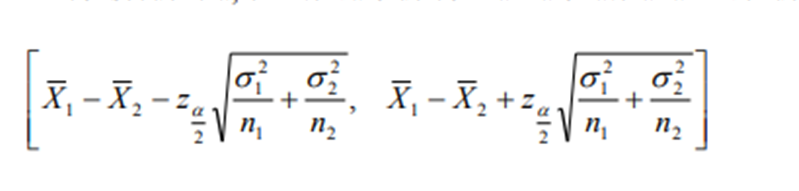


In [12]:
# Calculamos el estadístico "z" con un nivel de significacion de 0.05
z=round(scipy.stats.norm.ppf (1-.05 / 2),2)
z

1.96

In [13]:
# Calculamos la Varianza de Salario Neto de Hombres
var_A=round(groupA.var(),2)
var_A

10436596996.94

In [14]:
# Calculamos la Varianza de Salario Neto de Mujeres + Otros
var_B=round(groupB.var(),2)
var_B

3326892112.51

In [15]:
# Calculamos el tamaño de la muestra Salario Neto de Hombres
n_A = groupA.count()
n_A

4944

In [16]:
# Calculamos el tamaño de la muestra Salario Neto de Mujeres+Otros
n_B = groupB.count()
n_B

939

In [17]:
# Calculamos la suma de la varianzas dividido el tamaño de muestra de ambas muestras
A = round((var_A / n_A) + (var_B / n_B) , 2)
A

5653978.27

In [18]:
# Calculamos la raiz de lo anterior
import cmath
raizA=round((pow(A,0.5)),2)
raizA

2377.81

In [19]:
# Calculamos el límite superior como: dif media+z* raizA
Límite_Sup = round((dif_mean + (z * raizA)),2)
Límite_Sup

29270.84

In [20]:
# Calculamos el límite inferior como: dif media-z*raizA
Límite_Inf = round((dif_mean - (z * raizA)),2)
Límite_Inf

19949.82

In [23]:
# Calculamos de rango de intervalo de confianza del 95%
rango_ic= Límite_Sup-Límite_Inf
print(rango_ic)

9321.02



Con un nivel de confianza del 95\% el intervalo va a contener el verdadero valor del parámetro desconocido: la diferencia de medias salariales por género. En definitiva, inferimos con un 95% de confianza, que las diferencias entre los salarios netos de hombres con respecto al de mujeres y otros puede variar entre 19.949,82 y 29.270,84 pesos.

Esta hipótesis es una afirmación que debe ser sometida a prueba. El procedimiento para hacerlo se llama **prueba de las hipótesis** y  propone a traves de una serie de cálculos, demostrar que la afirmación anterior es correcta, al contrastarla con los datos obtenidos en la realidad.

Por lo tanto procederemos a realizar un **test de hipótesis**, donde buscaremos contrastar si las medias salariales por género son iguales: 
$H_0$: las medias salariales son iguales.
$H_1$: las medias salariales difieren.
Su resultado nos indica si hay evidencia suficiente para rechazar o aceptar la hipótesis nula, con un nivel de confianza del 95\%. Para ello se elige el estadístico adecuado y se define una zona de rechazo de la afirmación cuyos límites estarán relacionados al nivel de significacion con el que deseemos trabajar. 

Mientras que el intervalo de confianza nos indica el rango de la diferencia entre las medias, la prueba de hipótesis solo nos indica si hay evidencia suficiente para concluir si existe o no una diferencia entre las medias salariales, pero no indica de cuánto es esta diferencia. 

## Ejercicio 2: Test de hipótesis



## 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

No existe diferencia en la distribucion de los salarios entre los grupos A y B

$H_0$: $\mu_1-\mu_2=0$

$H_1$: $\mu_1-\mu_2 \neq 0$

2 - Establecimiento de nivel de significancia del test

**Estadístico (Pivote)**
  * Identificar el estadístico
Utilizando los datos del ejercicio anterior, se toma una muestra y α=0.05. Se utiliza la distribución T-Student con varianzas desconocidas pero iguales (en el ejercicio anterior se realizó el test correspondiente para contrastar este supuesto). 
  * La distribución bajo $H_0$ es una $T \sim n_A+n_B-2$
  * A fin de lograr la validacion de la Hipotesis Nula debemos definir un estadistico de comparacion.

Para el caso de población normal (esto se puede ver en el gráfico a continuación de las poblaciones de los salarios por género) o con $n\geq30$ y varianzas desconocidas pero iguales:

$$T = \dfrac{(\bar{X_A}-\bar{X_B})-(\mu_A-\mu_A)}{S\sqrt{\dfrac{1}{n_A}+\dfrac{1}{n_B}}}$$ 
Donde $$S^2 = \dfrac{\sum_{i=1}^{n_A}(X_A-\bar{X_A})^2+\sum_{i=1}^{n_B}(X_B-\bar{X_B})^2}{n_A+n_B-2}$$

En primera instancia nos parece importante conocer la distribución de la población y también su composición para luego pasar a la prueba de hipótesis junto con las conclusiones. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


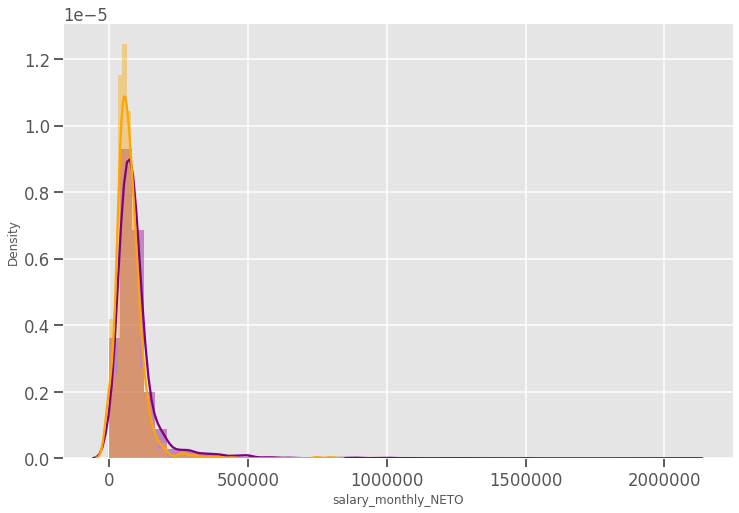

In [73]:
# Gráficos de la distribución de la poblaciones de hombres y de mujeres y otros
f,ax=plt.subplots(figsize=(12, 8))
seaborn.distplot(groupA, color = 'purple')
seaborn.distplot(groupB, color = 'orange')
# Remuevo la notación científica
plt.ticklabel_format(style='plain', axis='x')

In [71]:
# Vamos a tomar una muestra del 30% de la población de hombres y mujeres y otros respectivamente, esto se hace a fin
# de tener una muestra representativa, asi obtenemos estimaciones consistentes. Esta muestra se va a utilizar para graficar los datos y 
# hacer la prueba de hipótesis que se pide en el segundo ejercicio. 
alpha = 0.05
n2_A = 1350 #muestra
n2_B = 800
muestra_A = groupA.sample(n2_A, replace=False) #Muestra hombres
muestra_B = groupB.sample(n2_B, replace=False) #Muestra mujeres y otros

En el gráfico observamos que la muestra_a (hombres) posee una mayor densidad por la derecha. Es decir, alcanza salarios mayores que la muestra_b. El salario neto de mujeres y otros se encuentra más focalizada al rededor de los \$70000 - \$80000. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


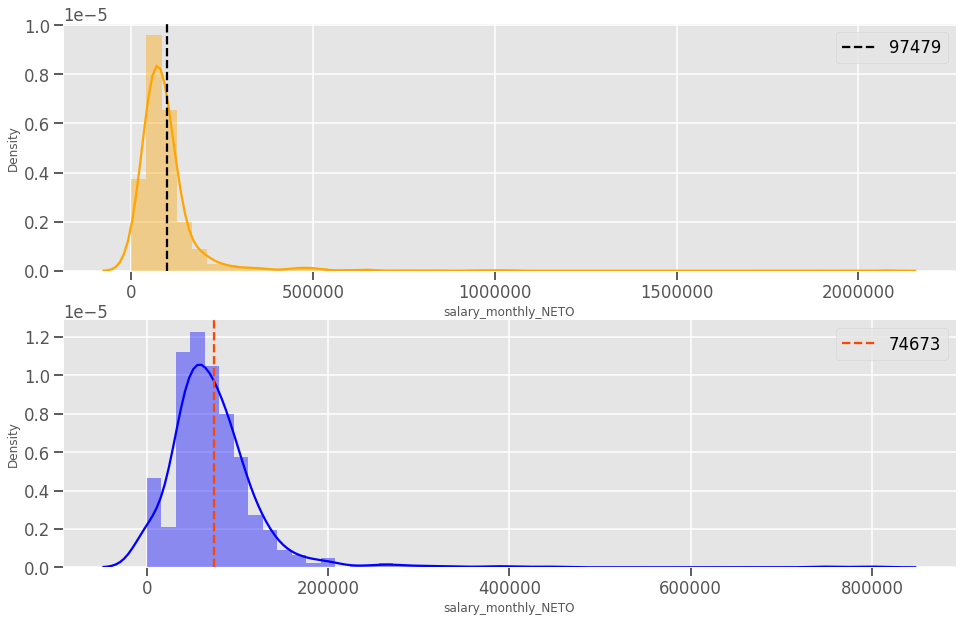

In [72]:
fig, axes = plt.subplots(nrows=2, figsize=(16, 10))

seaborn.distplot(muestra_A, color = 'orange', ax = axes[0])
axes[0].axvline(muestra_A.mean(), color='black',
            linestyle='--', label=round(muestra_A.mean()))
axes[0].ticklabel_format(style='plain', axis = 'x') #Remuevo notación científica

seaborn.distplot(muestra_B, color = 'blue', ax = axes[1])
axes[1].axvline(muestra_B.mean(), color='orangered',
            linestyle='--', label=round(muestra_B.mean()))

axes[0].legend()
axes[1].legend()
seaborn.despine()

El salario medio de un hombre es de \$97.479, mientras que el salario medio de mujeres y otros es de \$74.673. En promedio los hombres perciben \$22.806 más. ¿Por qué? 

In [68]:
N_A = groupA.count() # n poblacional Grupo A
N_B = groupB.count() # n poblacional Grupo B
print(N_A,N_B)

participacion_A = N_A / (N_A + N_B)

participacion_B = N_B / (N_A + N_B)
print( participacion_A, participacion_B)

4944 939
0.8403875573686894 0.15961244263131055


La población está compuesta un 84% por hombres y un 16% por otros.

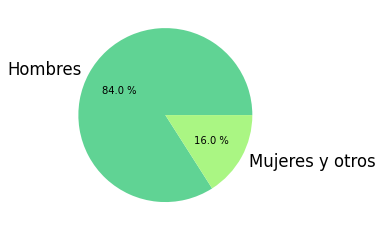

In [69]:
resultados = [participacion_A, participacion_B]
nombres = ["Hombres", "Mujeres y otros"]
colores = ["#60D394","#AAF683"]
plt.pie(resultados, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.show()

Tanto para la población como para la muestra, la desviación estandar del salario neto es mayor para los hombres que para los otros. La distribución se encuentra más comprimida para "otros", mientras que vemos outliers para los hombres. 


In [74]:
#desviacion y varianza de la encuesta (Poblacional)
desv_A = groupA.std()
desv_B = groupB.std()
varianza_A = groupA.var()
varianza_B = groupB.var()
print("Desviación / varianza standard de grupo A: {:.2f} / {:.2f}".format(desv_A, varianza_A))
print("Desviación / varianza standard de grupo B: {:.2f} / {:.2f}".format(desv_B, varianza_B))

Desviación / varianza standard de grupo A: 102159.66 / 10436596996.94
Desviación / varianza standard de grupo B: 57679.22 / 3326892112.51


In [75]:
#desviacion y varianza de las muestras (muestral)
desv_muestra_A = muestra_A.std()
desv_muestra_B = muestra_B.std()
varianza_muestra_A = muestra_A.var()
varianza_muestra_B = muestra_B.var()
print("Desviación / varianza standard de MUESTRA grupo A: {:.2f} / {:.2f}".format(desv_muestra_A, varianza_muestra_A))
print("Desviación / varianza standard de MUESTRA grupo B: {:.2f} / {:.2f}".format(desv_muestra_B, varianza_muestra_B))

Desviación / varianza standard de MUESTRA grupo A: 106682.49 / 11381152734.79
Desviación / varianza standard de MUESTRA grupo B: 60095.23 / 3611436934.81


Luego de todos estos análisis pasamos a realizar la prueba de hipótesis planteada al comienzo, donde vamos a constrastar si hay evidencia suficiente para concluir la existencia de una diferencia entre las medias salariales de acuerdo al género. 

In [76]:
from scipy.stats import norm
alpha = 0.05
d2f = n2_A+n2_B-2
t_alpha = scipy.stats.t.ppf(1-alpha/2, d2f)

In [93]:
media_muestra_A = muestra_A.mean()
media_muestra_B = muestra_B.mean()
media_A = groupA.mean()
media_B = groupB.mean()

#Cálculo de S:
#numerador: dado que la varianza es la suma del cuadrado de los desvíos respecto a la media dividido n, al multiplicar por n obtengo solo la sumatoria
# del cuadrado de los desvíos
nvar_muestra_A = muestra_A.var()*n2_A
nvar_muestra_B = muestra_B.var()*n2_B
Numerador = nvar_muestra_A+nvar_muestra_B
Denominador = d2f #Es igual a los grados de libertad
S = Numerador/Denominador

# calculamos el t_p del estadistico de comparacion para verificar t_p cae en la zona de rechazo o de no rechazo de la H0. 
t_p= ((media_muestra_A-media_muestra_B)-(media_A-media_B))/(numpy.sqrt(S*(1/n2_A+1/n2_B)))



print("Estadístico T observado {:.2f} / Estadístico T crítico: +/- {:.2f}".format(t_p, t_alpha))

#Segun los resultados obtenidos, el T observado cae en la zona de no rechazo de la H0, por ende no hay evidencia suficiente para concluir que hay 
# una diferencia de medias. 

Estadístico T observado -0.44 / Estadístico T crítico: +/- 1.96


### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.

2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

Para el calculo del pvalor se tomo una muestra con 20 datos (10 de hombres y 10 de otro genero). 
Dado que $n < 30$ y las varianzas son distintas, se utiliza el test de WELCH. Este test debería ser usado por default en vez de el test t-student dado que el test de Welch tiene una mejor performance cuando el tamaño de la muestra y las varianzas son distintas entre los grupos y además da el mismo resultado cuando el tamaño de muestra y las varianzas son iguales entre grupos. 

Los supuestos que se deben cumplir de este test son: 

- La variable independiente (género) es categórica con al menos dos niveles (grupos) 
- La variable dependiente (salario neto) es continua
- Las dos poblaciones se distribuyen normal 

Todos los supuestos se cumplen. 

In [128]:
# El tamaño de muestra debe ser igual para poder usar el stats.ttest_ind, se 
n_A = 10
n_B = 10
muestra1_A = groupA.sample(n_A, replace=False)
muestra1_B = groupB.sample(n_B, replace=False)
varianza_muestra1_A = muestra1_A.var()
varianza_muestra1_B = muestra1_B.var()
print("Varianza de la muestra A /Varianza de la muestra B : {:.2f} / {:.2f}".format(varianza_muestra1_A, varianza_muestra1_B))

Varianza de la muestra A /Varianza de la muestra B : 4528918027.45 / 719566666.67


# P_VALOR 
Se calcula el **p-valor**: mide la probabilidad de obtener los resultados observados, asumiendo que la hipótesis nula es verdadera. Si esta probabilidad es pequeña (menor que α ) se rechaza H0 y se concluye que la diferencia observada no es atribuible al azar y las medias de las dos poblaciones son diferentes.

In [133]:
# El test de Welch es una prueba donde la hipótesis nula es que las medias de dos muestras independientes son iguales. Dicho test asume que las poblaciones
# tinenen varianzas idénticas por default. 
# Importamos scipy para hacer el test
n_A = 10
n_B = 10
muestra1_A = groupA.sample(n_A, replace=False)
muestra1_B = groupB.sample(n_B, replace=False)

from scipy import stats
w = stats.ttest_ind(muestra1_A, muestra1_B, equal_var = False) 
w

Ttest_indResult(statistic=0.45722977371693463, pvalue=0.6535676675248692)

**Podemos observar que el P-valor > α lo que nos indica que la hipotesis nula es verdadera. Es decir, las medias entre los dos grupos no difieren. Este resultado concuerda con la prueba de hipótesis planteada anteriormente, por lo que se considera coherente.**

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


Para este último ejercicio vamos a elegir armar un tweet con todas las especificaciones que se piden. Este va a ser entregado en un archivo pdf junto con el archivo .ipynb donde se encuentran los cálculos y gráficos que se utilizaron para realizar el punto 3, junto con el resto de los ejercicios. 

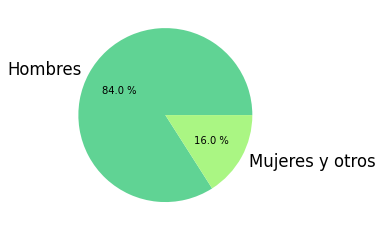

In [96]:
# Gráfico de torta que se va a visualizar en el tweet. 
resultados = [participacion_A, participacion_B]
nombres = ["Hombres", "Mujeres y otros"]
colores = ["#60D394","#AAF683"]
plt.pie(resultados, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.show()